In [3]:
include("../../SSE_potts/src/ranluxppJulia.jl")
using .ranluxppJulia

LoadError: Double registration for method Base.deepcopy_internal(CxxWrap.CxxWrapCore.ConstCxxRef{ranluxppJulia.ranluxpp}, Base.IdDict)::ranluxppJulia.ranluxppAllocated

In [7]:
rng=RanLuxppRNG()

RanLuxppRNG(Main.ranluxppJulia.ranluxppAllocated(Ptr{Nothing} @0x0000000003067a30))

In [28]:
rand(rng)

0.16451450978394622

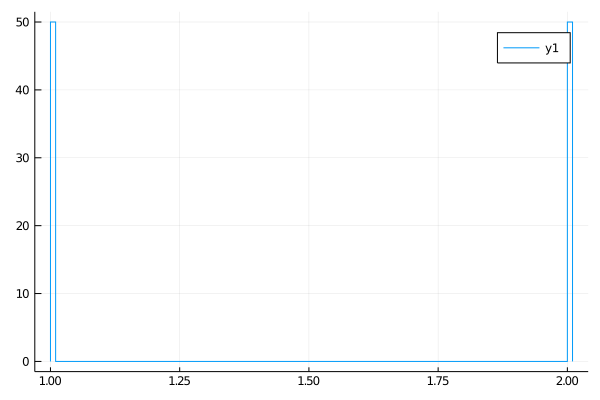

In [12]:
using Plots
histogram([rand(rng,1:2) for i in 1:10000000],normalized=true)

In [17]:
using BenchmarkTools
function gen_rand_MT(n,rng)
    for i in 1:n
        rand(rng)
    end
end
@btime rand(rng,1:2) setup=(rng=RanLuxppRNG())

  17.881 ns (0 allocations: 0 bytes)


2

In [18]:
function gen_rand_wrap(n,rng)
    for i in 1:n
        rand(rng)
    end
end
using Random
@btime rand(rng,1:2) setup=(rng=MersenneTwister())

  6.496 ns (0 allocations: 0 bytes)


1

In [14]:
using RandomNumbers
function gen_rand_wrap(n,rng)
    for i in 1:n
        rand(rng)
    end
end
using Random
@btime rand(rng,1:2) setup=(rng=RandomNumbers.PCG.PCGStateOneseq())

  7.706 ns (0 allocations: 0 bytes)


1

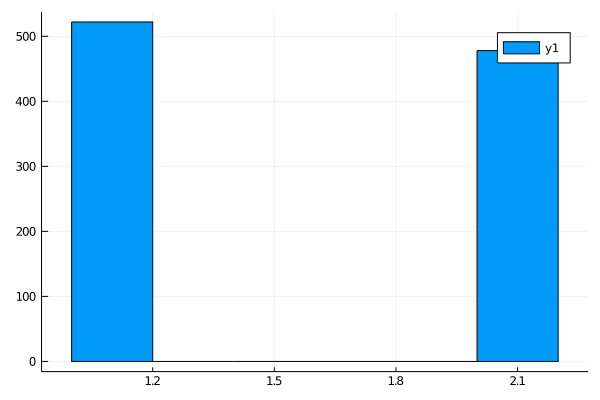

In [21]:
using Plots
histogram([rand(rng,1:2) for _ in 1:1000])

In [22]:
using Random

In [24]:
rngd=RandomDevice()

RandomDevice(true)

In [28]:
0.027150/(0.5*10^(-3))

54.29999999999999